# Programming Assignment: Convolution
## Name : 백찬희
## Student ID : 20142503
## Github : https://github.com/Baekchanhee/assignment05.git

# 필요한 패키지들 추가 및 이미지 읽기

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal
from skimage import io, color
from skimage import exposure

file_image	= 'cau.jpg'

im_color 	= io.imread(file_image)
im_gray  	= color.rgb2gray(im_color)

# input color image, input gray image

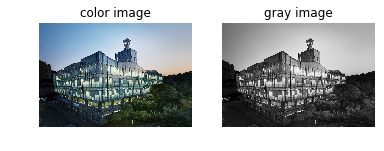

In [2]:
p1 = plt.subplot(1,2,1)
p1.set_title('color image')
plt.imshow(im_color)
plt.axis('off')

p2 = plt.subplot(1,2,2)
p2.set_title('gray image')
plt.imshow(im_gray, cmap='gray')
plt.axis('off')

plt.show()

# convolution kernel for computing the derivative in x-direction

In [3]:
kernel = np.array([[1,-1]]) # kernel
im_conv_x = signal.convolve2d(im_gray, kernel, boundary='symm', mode='same')
im_conv_x

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.        , -0.00784314, -0.01176471, ...,  0.00392157,
         0.00392157,  0.        ],
       [ 0.        , -0.00392157, -0.00784314, ...,  0.00784314,
         0.01176471,  0.00392157],
       [ 0.        , -0.00392157, -0.00784314, ...,  0.00784314,
         0.01176471,  0.00392157]])

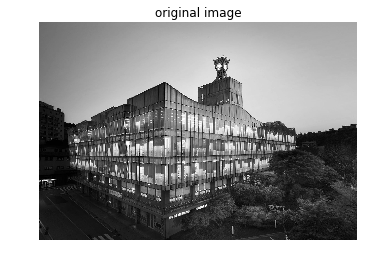

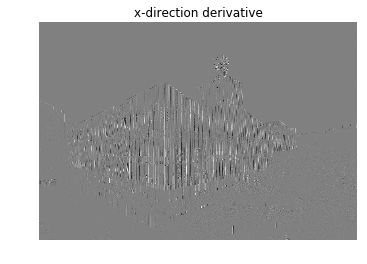

In [4]:
plt.imshow(im_gray, cmap='gray')
plt.axis('off')
plt.title('original image')
plt.show()

plt.imshow(im_conv_x, cmap='gray')
plt.axis('off')
plt.title('x-direction derivative')
plt.show()

# convolution kernel for computing the derivative in y-direction

In [5]:
kernel = np.array([[-1],[1]]) # kernel
im_conv_y = signal.convolve2d(im_gray, kernel, boundary='symm', mode='same')
im_conv_y

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.00392157, -0.00392157, -0.00392157, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-0.01568627, -0.01176471, -0.00392157, ...,  0.03137255,
         0.02745098,  0.03137255],
       [ 0.01960784,  0.01568627,  0.01176471, ..., -0.00784314,
        -0.01568627, -0.01960784],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

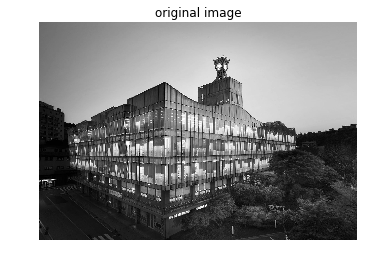

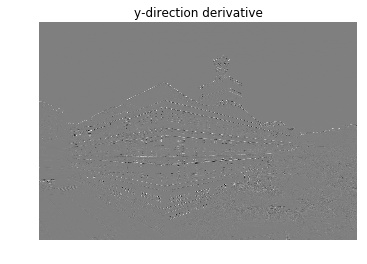

In [6]:
plt.imshow(im_gray, cmap='gray')
plt.axis('off')
plt.title('original image')
plt.show()

plt.imshow(im_conv_y, cmap='gray')
plt.axis('off')
plt.title('y-direction derivative')
plt.show()

# gradient의 크기를 계산하는 함수

In [7]:
def magnitude_of_gradient(x, y):
    
    x = x**2
    y = y**2
    result = (x + y) ** 0.5
    
    return result

# gradient의 방향을 계산하는 함수

In [8]:
def direction_of_gradient(x, y):
    
    degree = np.arctan(y/x)
    
    return np.degrees(degree)    

# gradient 크기

In [9]:
magnitude_of_gradient(im_conv_x, im_conv_y)

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.00392157, 0.00392157, 0.00392157, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.01568627, 0.01413942, 0.01240109, ..., 0.0316167 , 0.02772968,
        0.03137255],
       [0.01960784, 0.01616904, 0.01413942, ..., 0.01109187, 0.01960784,
        0.01999615],
       [0.        , 0.00392157, 0.00784314, ..., 0.00784314, 0.01176471,
        0.00392157]])

# gradient 방향 (nan 이면 크기 자체가 없는 것)

In [10]:
direction_of_gradient(im_conv_x, im_conv_y) 

C:\Users\Baek\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Baek\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Baek\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in arctan
  This is separate from the ipykernel package so we can avoid doing imports until


array([[         nan,          nan,          nan, ...,          nan,
                 nan,          nan],
       [         nan,          nan,          nan, ...,          nan,
                 nan,          nan],
       [-90.        , -90.        , -90.        , ...,          nan,
                 nan,          nan],
       ...,
       [-90.        ,  56.30993247,  18.43494882, ...,  82.87498365,
         81.86989765,  90.        ],
       [ 90.        , -75.96375653, -56.30993247, ..., -45.        ,
        -53.13010235, -78.69006753],
       [         nan,  -0.        ,  -0.        , ...,   0.        ,
          0.        ,   0.        ]])

# kernel for smoothing image 

In [11]:
kernel = np.array([[1,1,1,1],[1,1,1,1],[1,1,1,1],[1,1,1,1]]) 
kernel = kernel / 16
im_conv_smoothing = signal.convolve2d(im_gray, kernel, boundary='symm', mode='same')

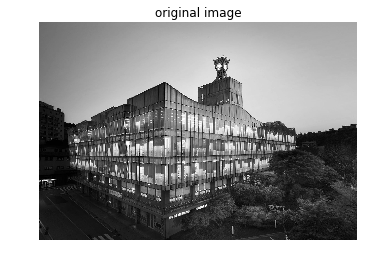

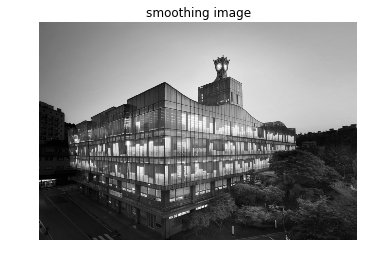

In [12]:
plt.imshow(im_gray, cmap='gray')
plt.axis('off')
plt.title('original image')
plt.show()

plt.imshow(im_conv_smoothing, cmap='gray')
plt.axis('off')
plt.title('smoothing image')
plt.show()

# 밝기 반전 하는 kernel

In [13]:
kernel = np.array([[-1]]) 
im_conv_reversed = signal.convolve2d(im_gray, kernel, boundary='symm', mode='same')

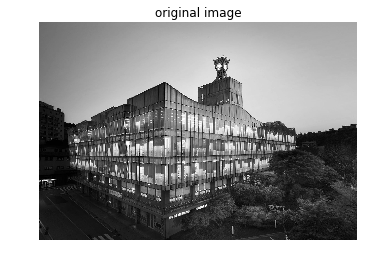

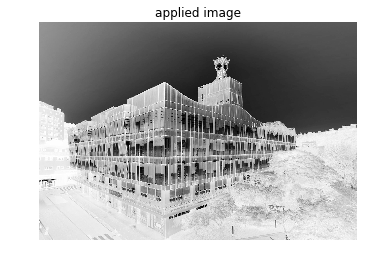

In [14]:
plt.imshow(im_gray, cmap='gray')
plt.axis('off')
plt.title('original image')
plt.show()

plt.imshow(im_conv_reversed, cmap='gray')
plt.axis('off')
plt.title('applied image')
plt.show()